# Constrained optimization

## Bound constraints
Often the parameters of an optimization problems are subject to (often abbreviated as s. t.) constraints. In practice, constraints make solving an optimization problem much more difficult. In the simplest case, these can be simple box constraints for the parameters. 

Consider the Rosenbrock function with box constraints:

$$
\begin{align}
\underset{x, y}{argmin} (1-x)^2+100(y-x^2)^2 \\
\text{s. t. } x\ \in [-1, 0.5],\ y\in [1.5 , 2]
\end{align}
$$

Bounds have to be provided as a list of (lower_bound, upper_bound) for each coordinate:

[-0.69845641  0.5       ]


<ipython-input-1-b838b1401c57>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, vmin = 0, vmax = 10)


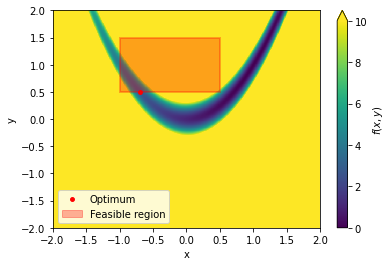

In [1]:
import simplenlopt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def rosenbrock(pos):
    
    x, y = pos
    return (1-x)**2 + 100 * (y - x**2)**2

x0 = np.array([-0.5, 0.6])
bounds=[(-1, 0.5), (0.5, 1.5)]
res = simplenlopt.minimize(rosenbrock, x0, bounds = bounds)
print(res.x)

X = np.linspace(-2, 2, 500)
Y = np.linspace(-2, 2, 500)

XX, YY = np.meshgrid(X, Y)
Z = (1-XX)*(1-XX)+100*(YY-XX*XX)**2

fig, ax = plt.subplots()
plt.pcolormesh(XX, YY, Z, vmin = 0, vmax = 10)
box = plt.Rectangle((-1, 0.5),1.5, 1, facecolor='r', edgecolor='r', lw = 2, alpha = 0.3)
plt.colorbar(extend='max', label="$f(x, y)$")
ax.add_patch(box)
ax.scatter([res.x[0]], [res.x[1]], c='r', s = 15, label='Optimum')
handles, labels = ax.get_legend_handles_labels()
legend_patch = Patch(facecolor='red', edgecolor='r', alpha = 0.3, 
                         label='Feasible region')
handles.append(legend_patch)
ax.legend(handles = handles)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

## Inequality and equality constraints

General inequality and equality constraints reduce the parameter space by linear or nonlinear functions. Let's say we are interested in the minimum of the rosenbrock function which fulfills that $y\geq 0.5-x$ and $y\leq 1-x^2$. In typical optimization notation, constraints are formulated by defining a function of the optimization parameters $f(\mathbf{x})\leq 0$ for inequality constraints and $f(\mathbf{x})=0$ for equality constraints. In this notation, our constrained Rosenbrock problem would be written as

$$
\begin{align}
\underset{x, y}{argmin} (1-x)^2 & +100(y-x^2)^2 \\
s.\ t.\ 0.5 -x -y &\leq 0\\
y+x^2-1 &\leq 0
\end{align}
$$

In SciPy/simplenlopt style, a constraint has to be provided as a dictionary with at least two keys: ``const={type:'ineq'/'eq', 'fun'}``. ``'fun'`` must be of the form ``fun(x, *args)`` just like the objective function. All constraints then have to be passed as a list to minimize.

Found optimum position:  [0.70747223 0.49948304]
Number of function evaluations:  273


<ipython-input-2-b68453b802b1>:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z, vmin = 0, vmax = 10, alpha = 0.5)


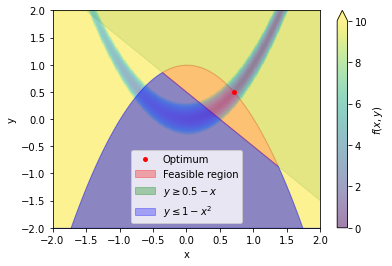

In [2]:
def rosenbrock(pos):
    
    x, y = pos
    return (1-x)**2 + 100 * (y - x**2)**2

def constraint_1(pos):
    x, y = pos
    return 0.5-x-y

def constraint_2(pos):
    x, y = pos
    return y+x*x -1

ineq_constraint_1 = {'type':'ineq', 'fun':constraint_1}
ineq_constraint_2 = {'type':'ineq', 'fun':constraint_2}

x0 = np.array([0.5, 0.5])
res = simplenlopt.minimize(rosenbrock, x0, constraints=[ineq_constraint_1, ineq_constraint_2])
print("Found optimum position: ", res.x)
print("Number of function evaluations: ", res.nfev)

fig, ax = plt.subplots()
plt.pcolormesh(XX, YY, Z, vmin = 0, vmax = 10, alpha = 0.5)

y_constraint_1 = 0.5-X
y_constraint_2 = 1 - X*X

constraint_1_region_lower_bound = np.maximum(y_constraint_1, y_constraint_2)
constraint_2_region_upper_bound = np.minimum(y_constraint_1, y_constraint_2)

#ax.plot(X, y_constraint_1, zorder=1, c='r')#, label = 'Constraint 1: $0.5-x$')
#ax.plot(X, y_constraint_2, zorder=1, c='k')#, label = 'Constraint 2: $1-x^2$')
ax.fill_between(X, constraint_1_region_lower_bound, np.full_like(X, 2), color='green', edgecolor = 'green', alpha=0.1)
ax.fill_between(X, constraint_2_region_upper_bound, np.full_like(X, -2), color='blue', edgecolor = 'blue', alpha=0.45)

ax.fill_between(X, y_constraint_1, y_constraint_2, where=(y_constraint_2 > y_constraint_1), color='r', alpha=0.2)#where=(y1 > y2) 
plt.colorbar(extend='max', label="$f(x, y)$")
ax.scatter([res.x[0]], [res.x[1]], c='r', s = 15, zorder=2, label='Optimum')
handles, labels = ax.get_legend_handles_labels()
legend_patch_feasible = Patch(facecolor='red', edgecolor='r', alpha = 0.3, 
                         label='Feasible region')
legend_patch_constraint1 = Patch(facecolor='green', edgecolor='g', alpha = 0.3, 
                         label='$y\geq 0.5-x$')
legend_patch_constraint2 = Patch(facecolor='blue', edgecolor='blue', alpha = 0.3, 
                         label='$y\leq 1-x^2$')
handles.extend((legend_patch_feasible, legend_patch_constraint1, legend_patch_constraint2))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.legend(handles = handles, loc='lower center')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

## Augmented Lagrangian

Many optimization algorithms were originally not developed to deal with constraints. NLopt provides a powerful way around this: the augmented Lagrangian. Similarly to regularization in machine learning, the augmented lagrangian adds increasing penalty terms to penalize violation of the constraints until they are met. This makes it possible to also use algorithms which were originally not designed to handle constraints. In simplenlopt, the minimize function automatically calls the augmented lagrangian if an optimizer cannot deal with the supplied constraints. Here, we will use the BOBYQA algorithm for the same constrained Rosenbrock problem.

In [3]:
res = simplenlopt.minimize(rosenbrock, x0, method = 'bobyqa', constraints=[ineq_constraint_1, ineq_constraint_2])
print("Found optimum position: ", res.x)
print("Number of function evaluations: ", res.nfev)

Found optimum position:  [0.70747058 0.49948457]
Number of function evaluations:  753


C:\Users\danie\.conda\envs\simplenlopt_env\lib\site-packages\simplenlopt\_Core.py:479: RuntimeWarning: Method bobyqa does not support constraints. Constraints will be handled by augmented lagrangian. In case of problems consider method='COBYLA'.
  warn("Method {} does not support constraints. "


The augmented lagrangian can also be directly called with by the function 'auglag' which uses the same arguments as minimize. As auglag does not apply the same checks as minimize, calling it directly reduces some small overhead.

In [4]:
res = simplenlopt.auglag(rosenbrock, x0, method = 'bobyqa', constraints=[ineq_constraint_1, ineq_constraint_2])
print(res.x)

[0.70747058 0.49948457]
